# Recommendation Option 3

### Single Value Decomposition with all words

In [24]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [25]:
beers = pd.read_csv('data/corrected_cvec.csv')
beers.drop('Unnamed: 0',axis =1, inplace = True)
beers.head()

,ab,aback,abacus,abandon,abate,abates,abbey,abbeys,abbot,abbreviated,...,zestful,zesty,zilch,zing,zingy,zip,zippy,zombie,zone,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
beer_info = pd.read_csv('data/Beers_U.csv')[['Beer_Name','Brewery_Name','ABV','Type']]
beer_info.head()

,Beer_Name,Brewery_Name,ABV,Type
0,That's What She Said,Tree House Brewing Company,5.60,Milk / Sweet Stout
1,Triple Bag,Long Trail Brewing Co.,11.00,American Strong Ale
2,Great Lakes Devil's Pale Ale,Great Lakes Brewery,6.60,English Pale Ale
3,Hornswoggled,Cigar City Brewing,5.00,Irish Red Ale
4,Schlafly Raspberry Hefeweizen,The Schlafly Tap Room,4.10,Fruit / Vegetable Beer


In [27]:
beer_info['Beer_Name_Full'] = beer_info['Brewery_Name']+' : '+beer_info['Beer_Name']


In [28]:
print(beers.shape)
print(beer_info.shape)

(9490, 11751)
(9490, 5)


In [29]:
# Tegrity check.  just want to do an eyeball comparison of the first observation in each dataframe
beers.iloc[0].sort_values(ascending = False)[:15]

chocolate    37
milk         33
lactose      27
beer         24
stout        23
creamy       21
dark         18
light        18
roast        17
taste        17
head         16
coffee       16
malt         16
good         16
brown        15
Name: 0, dtype: int64

In [30]:
#These values are what I would expect to see in a Milk Stout.

In [31]:
# Manually searched through beer types to remove them I don't want a stout being recommended
# because a stout was the input and the word "stout" was used alot by reviewers when referring to
# "this stout" or "that stout"
beers.columns.contains('weizenbock')

False

In [32]:
['stout','porter','lager','pa',]

['stout', 'porter', 'lager', 'pa']

In [33]:
# making sparse for computational reduction
beers = beers.to_sparse()

In [34]:
from sklearn.decomposition import TruncatedSVD
# after exploring, I found out that variance explained drops of after 400 componenets
SVD = TruncatedSVD(n_components=400) 
svd_matrix = SVD.fit_transform(beers)
svd_matrix.shape

(9490, 400)

Text(0.5, 1.0, 'Explained variance by component')

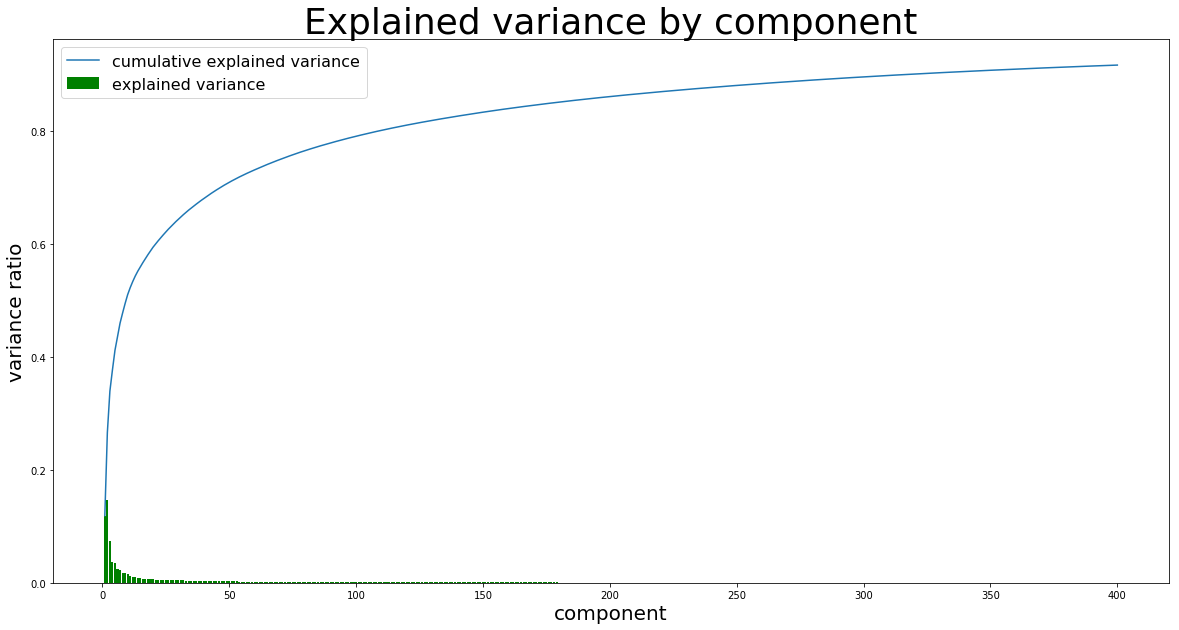

In [35]:
fig = plt.figure(figsize=(20,10))
plt.bar(np.array(range(400))+1, 
        SVD.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(400))+1, 
         np.cumsum(SVD.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend(fontsize=16)
plt.xlabel('component', fontsize=20)
plt.ylabel('variance ratio', fontsize=20)
plt.title('Explained variance by component', fontsize=36)

In [36]:
cms = cosine_similarity(svd_matrix, svd_matrix)
cms.shape

(9490, 9490)

In [37]:
search_df = pd.SparseDataFrame(cms, columns = beer_info.Beer_Name_Full,index = beer_info.Beer_Name_Full)
search_df.head()


Beer_Name_Full,Tree House Brewing Company : That's What She Said,Long Trail Brewing Co. : Triple Bag,Great Lakes Brewery : Great Lakes Devil's Pale Ale,Cigar City Brewing : Hornswoggled,The Schlafly Tap Room : Schlafly Raspberry Hefeweizen,Brasserie Ellezelloise : Hercule Stout,Lagunitas Brewing Company : Censored,Brasserie de l'Abbaye des Rocs s.a. : Brasserie Des Rocs Triple Impériale,Cambridge Brewing Company : Arquebus,Temperance Beer Co. : Gatecrasher,...,New Belgium Brewing : Fat Tire Belgian White,3 Floyds Brewing Co. : Necron 99,Bierbrouwerij De Koningshoeven B.V. : Tilburg's Dutch Brown Ale,New Glarus Brewing Company : Laughing Fox,Trillium Brewing Company : Dialed In (w/ Chardonnay & Gewürztraminer Juice),BrewDog : Riptide,Atlantic Brewing Company / Mainely Meat BBQ : New Guy IPA,Les Brasseurs de Gayant : Saint Landelin La Divine,Hill Farmstead Brewery : George,Köstritzer Schwarzbierbrauerei GmbH & Co. : Köstritzer Schwarzbier
Beer_Name_Full,,,,,,,,,,,,,,,,,,,,,
Tree House Brewing Company : That's What She Said,1.000000,0.633137,0.604165,0.542282,0.440891,0.755049,0.577443,0.628608,0.526733,0.572479,...,0.475703,0.526270,0.655602,0.548794,0.443636,0.773286,0.539166,0.565594,0.632368,0.713570
Long Trail Brewing Co. : Triple Bag,0.633137,1.000000,0.808540,0.668704,0.568247,0.801001,0.836411,0.822502,0.738503,0.742938,...,0.616791,0.759219,0.841537,0.700867,0.578352,0.793885,0.733232,0.764340,0.742199,0.784461
Great Lakes Brewery : Great Lakes Devil's Pale Ale,0.604165,0.808540,1.000000,0.628341,0.520039,0.710202,0.875261,0.676777,0.643042,0.833760,...,0.601995,0.780810,0.778016,0.656678,0.588209,0.713892,0.840410,0.726342,0.776371,0.754036
Cigar City Brewing : Hornswoggled,0.542282,0.668704,0.628341,1.000000,0.469038,0.631373,0.679038,0.612030,0.650544,0.589988,...,0.562934,0.630327,0.663153,0.595204,0.491023,0.596073,0.578375,0.623743,0.590791,0.635840
The Schlafly Tap Room : Schlafly Raspberry Hefeweizen,0.440891,0.568247,0.520039,0.469038,1.000000,0.581217,0.568182,0.605160,0.566563,0.573431,...,0.619189,0.552679,0.562576,0.672460,0.501650,0.531490,0.546857,0.621423,0.439047,0.521715


In [38]:
search_df.sort_index(axis =0, inplace = True)
search_df.sort_index(axis =1, inplace = True)

In [39]:
# Set the full name to the index so it can be use to search.
beer_info.set_index('Beer_Name_Full', inplace = True)

In [40]:
# Pickle dataframe from later
search_df.to_pickle('./Data/modeldata/dataframe_AW_SVD')

In [41]:
def recommend(beer_name, df = search_df, info = beer_info):
    top_ten = df.loc[beer_name].sort_values(ascending = False)[1:11].index
    return info.loc[top_ten].set_index('Beer_Name')

In [42]:
def search_beer(name):
    return beer_info[beer_info.index.str.contains(name,case = False, regex = True)]


### Start from the Bottom
Lets from the bottom of the beer bucket.  Unfortunately, I have a friend who loves Busch Beer (and hates getting iced). Lets see what <strike>crap</strike> _"beers"_ are recommended for him.  



In [43]:
# Find Busch
search_beer('Anheuser-Busch : Busch')

,Beer_Name,Brewery_Name,ABV,Type
Beer_Name_Full,,,,
Anheuser-Busch : Busch Light,Busch Light,Anheuser-Busch,4.10,Light Lager
Anheuser-Busch : Busch Ice,Busch Ice,Anheuser-Busch,5.90,American Adjunct Lager
Anheuser-Busch : Busch Beer,Busch Beer,Anheuser-Busch,4.30,American Adjunct Lager


In [44]:
recommend('Anheuser-Busch : Busch Beer')

,Brewery_Name,ABV,Type
Beer_Name,,,
Natural Light,Anheuser-Busch,4.20,Light Lager
Labatt Blue Light,Labatt Brewing Company Ltd.,4.00,Light Lager
Miller Lite,Miller Brewing Co.,4.17,Light Lager
Keystone Light,Coors Brewing Company (Molson-Coors),4.10,Light Lager
Miller 64,Miller Brewing Co.,2.80,Light Lager
Bud Ice,Anheuser-Busch,5.50,American Adjunct Lager
Milwaukee's Best Light,Miller Brewing Co.,4.20,Light Lager
Coors Light,Coors Brewing Company (Molson-Coors),4.20,Light Lager
Busch Light,Anheuser-Busch,4.10,Light Lager


In [45]:
# My brother became a hipster in college
recommend('Pabst Brewing Company : Pabst Blue Ribbon (PBR)')

,Brewery_Name,ABV,Type
Beer_Name,,,
Quilmes,Cervecería y Maltería Quilmes / Grupo Bemberg,4.90,American Adjunct Lager
Genesee Beer,Genesee Brewing Co. / Dundee Brewing Co.,4.50,American Adjunct Lager
Keystone Light,Coors Brewing Company (Molson-Coors),4.10,Light Lager
Famosa (Gallo),"Cervecería Centro Americana, S.A.",5.00,American Adjunct Lager
Foster's Lager,Foster's Group Limited,5.00,American Adjunct Lager
Budweiser,Anheuser-Busch,5.00,American Adjunct Lager
Rolling Rock Extra Pale,Latrobe Brewing Co.,4.60,American Adjunct Lager
Modelo Especial,Grupo Modelo S.A. de C.V.,4.40,American Adjunct Lager
Schaefer,F & M Schaefer Brewing Co.,4.60,American Adjunct Lager


In [46]:
# this ones for you Camouflage
recommend('Anheuser-Busch : Bud Light')

,Brewery_Name,ABV,Type
Beer_Name,,,
Miller 64,Miller Brewing Co.,2.80,Light Lager
Michelob Ultra,Anheuser-Busch,4.20,Light Lager
Natural Light,Anheuser-Busch,4.20,Light Lager
Budweiser,Anheuser-Busch,5.00,American Adjunct Lager
Miller Lite,Miller Brewing Co.,4.17,Light Lager
Budweiser Select 55,Anheuser-Busch,2.40,Light Lager
Corona Light,Grupo Modelo S.A. de C.V.,4.10,Light Lager
Keystone Light,Coors Brewing Company (Molson-Coors),4.10,Light Lager
Rock Green Light,Latrobe Brewing Co.,3.70,Light Lager


### Something a little more traditional.

My dad likes Stella Artois.  (I like how The Dude pronounces it 'Stella Arttoes')
Lets see if we can find some similar European Pale Lagers...

In [47]:
# Find Stella
search_beer('Stella Artois')

,Beer_Name,Brewery_Name,ABV,Type
Beer_Name_Full,,,,
Stella Artois : Club De Stella Artois,Club De Stella Artois,Stella Artois,5.90,Euro Pale Lager
Stella Artois : Stella Artois,Stella Artois,Stella Artois,5.00,Euro Pale Lager


In [48]:
recommend('Stella Artois : Stella Artois')

,Brewery_Name,ABV,Type
Beer_Name,,,
Efes Pilsener,Anadolu Efes Brewery,5.00,German Pilsener
Birra Moretti,Birra Moretti (Heineken),4.60,Euro Pale Lager
Kronenbourg 1664,Brasseries Kronenbourg,5.50,Euro Pale Lager
DAB Original,Dortmunder Actien Brauerei / DAB,5.00,Dortmunder / Export Lager
Quilmes,Cervecería y Maltería Quilmes / Grupo Bemberg,4.90,American Adjunct Lager
Grolsch Premium Lager,Grolsch Bierbrouwerij N.V.,5.00,Euro Pale Lager
Peroni Nastro Azzurro,Birra Peroni Industriale S.p.A.,5.10,Euro Pale Lager
Carlsberg Beer,Carlsberg Danmark A/S,5.00,Euro Pale Lager
Zywiec Beer,Zywiec Breweries PLC (Heineken),5.60,Euro Pale Lager


In [49]:
# Grandma likes Heineken
recommend('Heineken Nederland B.V. : Heineken Pilsener')
# These results are quick interesting.

,Brewery_Name,ABV,Type
Beer_Name,,,
Clausthaler Premium (Non-Alcoholic/Alkoholfrei),Binding-Brauerei AG,0.45,Low Alcohol Beer
Löwenbräu Original,Löwenbräu AG,5.20,Munich Helles Lager
Heineken Lager Beer,Heineken Nederland B.V.,5.00,Euro Pale Lager
Taiwan Beer,Taiwan Tobacco & Liquor Corporation,4.50,American Adjunct Lager
Beerlao Lager,Lao Brewery Co.,4.90,Japanese Rice Lager
Grain Belt Premium,August Schell Brewing Company,4.60,American Adjunct Lager
Flying Horse Royal Lager,United Breweries - UB Group,4.70,American Pale Lager
Almaza Pilsner Beer,Brasserie Almaza S.A.L.,4.20,German Pilsener
Kingfisher Premium Lager,United Breweries - UB Group,4.80,Euro Pale Lager


### Lets Switch it up!
And look at why this recommended was created.

I have some friends, they really like Jai Alai IPA from Cigar City. I agree with them, its a pretty good.

In [50]:
recommend('Cigar City Brewing : Jai Alai IPA')
# some solid recommendations

,Brewery_Name,ABV,Type
Beer_Name,,,
Union Jack IPA,Firestone Walker Brewing Co.,7.50,American IPA
Hop Henge Experimental IPA,Deschutes Brewery,9.30,American Double / Imperial IPA
Terrapin Hopsecutioner,Terrapin Beer Company,7.30,American IPA
Big Eye IPA,Ballast Point Brewing Company,7.00,American IPA
Founders Centennial IPA,Founders Brewing Company,7.20,American IPA
White Knuckle Double IPA,Marin Brewing Company,8.00,American Double / Imperial IPA
Titan IPA,Great Divide Brewing Company,7.10,American IPA
Islander IPA,Coronado Brewing Company,7.00,American IPA
Furious,Surly Brewing Company,6.60,American IPA


In [51]:
recommend('New Belgium Brewing : La Folie')

,Brewery_Name,ABV,Type
Beer_Name,,,
Cuvée Des Jacobins Rouge,Brouwerij Bockor N.V. / Brouwerij Omer Vander ...,5.50,Flanders Red Ale
Panil Barriquée (Italy Version),Panil,8.00,Flanders Red Ale
Panil Barriquée (Sour Version),Panil,8.00,Flanders Red Ale
Haandbakk,HaandBryggeriet,8.50,Flanders Oud Bruin
Rodenbach Grand Cru,Brouwerij Rodenbach N.V.,6.00,Flanders Red Ale
Red Poppy Ale,The Lost Abbey,5.50,Flanders Red Ale
La Roja,Jolly Pumpkin Artisan Ales,7.20,American Wild Ale
Duchesse De Bourgogne,Brouwerij Verhaeghe,6.00,Flanders Red Ale
Grande Dame Oud Bruin,Brasserie Trois Dames,7.20,Flanders Oud Bruin


In [52]:
recommend("New Belgium Brewing : Hop Kitchen - APA (FOCOllaboration W/ Odell Brewing)")
# Just because its not made anymore doesn't mean we can't find something similar


,Brewery_Name,ABV,Type
Beer_Name,,,
Apex,Bear Republic Brewing Co.,8.25,American Double / Imperial IPA
Rogue Farms 7 Hop IPA,Rogue Ales,7.77,American IPA
Estate Homegrown Wet Hop Ale,Sierra Nevada Brewing Co.,6.70,American IPA
Nectar IPA,Humboldt Brewing Co.,6.70,American IPA
Union Jack IPA,Firestone Walker Brewing Co.,7.50,American IPA
Terrapin Hopsecutioner,Terrapin Beer Company,7.30,American IPA
AleSmith IPA,AleSmith Brewing Company,7.25,American IPA
Old 21 Imperial IPA,The Brew Kettle Taproom & Smokehouse / Product...,9.50,American Double / Imperial IPA
Founders Centennial IPA,Founders Brewing Company,7.20,American IPA


In [53]:
# Sculpin is good but often overpriced (in my opinion)
recommend('Ballast Point Brewing Company : Sculpin IPA')

,Brewery_Name,ABV,Type
Beer_Name,,,
Pliny The Elder,Russian River Brewing Company,8.00,American Double / Imperial IPA
Dreadnaught IPA,3 Floyds Brewing Co.,9.50,American Double / Imperial IPA
Just Outstanding IPA,Kern River Brewing Company,6.80,American IPA
Hop Stoopid,Lagunitas Brewing Company,8.00,American Double / Imperial IPA
Apex,Bear Republic Brewing Co.,8.25,American Double / Imperial IPA
Pure Hoppiness,Alpine Beer Company,8.00,American Double / Imperial IPA
AleSmith IPA,AleSmith Brewing Company,7.25,American IPA
Wildcat India Pale Ale,Snoqualmie Falls Brewing Company & Taproom,6.60,American IPA
Hopzilla,Lawson's Finest Liquids,8.70,American Double / Imperial IPA


In [54]:
# A beer that you litterally drink 2-3oz at a time
recommend('Dogfish Head Craft Brewery : 120 Minute IPA')

,Brewery_Name,ABV,Type
Beer_Name,,,
Dominion Millennium Ale,Old Dominion Brewing Company,10.50,English Barleywine
Kuhnhenn TRIPA,Kuhnhenn Brewing Company,11.25,American Double / Imperial IPA
Druid Fluid,"Middle Ages Brewing Co., Ltd.",9.50,American Barleywine
10th Anniversary Double India Pale Ale,"Middle Ages Brewing Co., Ltd.",10.00,American Double / Imperial IPA
Yang,Evil Twin Brewing,10.00,American Double / Imperial IPA
Founders Devil Dancer,Founders Brewing Company,12.00,American Double / Imperial IPA
Drake's Denogginizer,Drake's Brewing Co.,9.75,American Double / Imperial IPA
Hop Juice Double IPA,Oggi's Pizza & Brewing Co.,9.40,American Double / Imperial IPA
Stone RuinTen Triple IPA,Stone Brewing,10.80,American Double / Imperial IPA


In [55]:
# Beer that made me really like Pale Ales
recommend("BJ's Restaurant & Brewhouse : Piranha Pale Ale")

,Brewery_Name,ABV,Type
Beer_Name,,,
Piranha Pale Ale,BJ's Chicago Pizza & Brewery Inc.,5.70,American Pale Ale (APA)
Fish Tale India Pale Ale,Fish Brewing Company / Fishbowl Brewpub,6.50,American IPA
Poleeko Pale Ale,Anderson Valley Brewing Company,5.00,American Pale Ale (APA)
Third Eye P.A.,Steamworks Brewing Co.,6.40,American IPA
Back Yard India Pale Ale,Cooperstown Brewing Company,6.10,English India Pale Ale (IPA)
Tipperary Pale Ale,Moylan's Brewery,5.00,American Pale Ale (APA)
Hale's Pale American Ale,Hale's Ales Brewery & Pub,4.70,American Pale Ale (APA)
ImPaled Ale,"Middle Ages Brewing Co., Ltd.",6.50,English India Pale Ale (IPA)
Pale Ale,Santa Fe Brewing Company,5.40,American Pale Ale (APA)


In [56]:
# Roommate says this brown ale
recommend('Upslope Brewing Company - Lee Hill : Brown Ale')

,Brewery_Name,ABV,Type
Beer_Name,,,
Peter Brown Tribute Ale,Bear Republic Brewing Co.,6.30,American Brown Ale
Nimbus Nut Brown Ale,Nimbus Brewing Company,5.00,English Brown Ale
Pullman Nut Brown,Flossmoor Station Restaurant & Brewery,6.00,English Brown Ale
George,Hill Farmstead Brewery,6.00,American Brown Ale
Gnarly Brown,MadTree Brewing,7.00,American Brown Ale
Face Down Brown,Telluride Brewing Co.,5.70,American Brown Ale
Pig's Ear Brown Ale,Woodstock Inn Brewery,4.30,English Brown Ale
The Brown Note,Against The Grain Brewery & Smokehouse,5.00,English Brown Ale
Tröegs Rugged Trail Nut Brown Ale,Tröegs Brewing Company,5.00,English Brown Ale
